<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#------------------------------------
## code starts here
#------------------------------------

In [0]:
# Import parkage we need
##--------------------------

In [0]:
!git clone https://github.com/ZhyShe/18ma573ZhiyuanShe

Cloning into '18ma573ZhiyuanShe'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 261 (delta 17), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (261/261), 1.58 MiB | 9.94 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [0]:
cd/content/18ma573ZhiyuanShe/src/

/content/18ma573ZhiyuanShe/src


In [0]:
ls sde_1d_v01.py

sde_1d_v01.py


In [0]:
ls contract_v01.py

contract_v01.py


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from contract_v01 import VanillaOption
from sde_1d_v01 import Sde_1d, Gbm_1d
import scipy.optimize as so

In [0]:
#-------------------------------------

In [0]:
#--------------------------------------
# Test BSM geometric asian option price
#--------------------------------------
gbm1 = Gbm_1d(init_state=100., drift_ratio=.0475, vol_ratio=.2)
goa1=gbm1.bsm_geometric_asian_price(otype=1, strike=110, marturity=1, num_step=4)
print('>>>>>>>>>> geometric call option value is ' + str(goa1))

>>>>>>>>>> geometric call option value is 1.607164727431734


In [0]:
#------------------------------------
## initialize the Statistics we need
#-----------------------------------
'''
spot: market_price of option
rate: interest rate
otype: type of option 1 for call;-1 for put

'''
spot=100
rate=.05

otype=1
marturity=2/12
num_step=8
strike_list=[97,99,101,103]
market_price_list=[
    3.7925736094875964,
    2.5429985313737244,
    1.6026613800895042,
    0.9366198675047346]

In [0]:
def erro_function(sigma, strike_list,market_price_list):
  erro=0
  gbm1 = Gbm_1d(init_state=spot, drift_ratio=rate, vol_ratio=sigma)
  for strike, market_price in zip(strike_list,market_price_list):
    erro+=(gbm1.bsm_geometric_asian_price(otype=1, strike=strike,marturity=marturity, num_step=8)-market_price)**2
  return erro
    
def calibration_Absm(strike_list,market_price_list):
  init_vol=.1
  return so.fmin(erro_function, init_vol, args = (strike_list, market_price_list), disp = 0)[0]

In [0]:
sigma=0.18109375000000028
values=[]
gbm1 = Gbm_1d(init_state=spot, drift_ratio=rate, vol_ratio=sigma)
for strike, market_price in zip(strike_list,market_price_list):
  values.append(gbm1.bsm_geometric_asian_price(otype=1, strike=strike,marturity=marturity, num_step=8))
print('>>>>>>>>> calibrated price are:\n ')
for value in values:
  print(value)

>>>>>>>>> calibrated price are:
 
3.807571582023542
2.4020600269716677
1.3571851322662047
0.6779174887750915


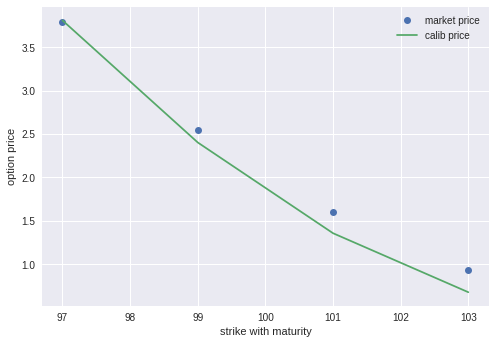

In [0]:
x_co = strike_list
y_co = market_price_list
plt.plot(x_co, y_co, 'o', label='market price')

y_co = values
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with maturity')
plt.legend()
plt.show()

I found **Euler method** defined in **Sde_1d** is not used in this homework. Inorder to test its corrcetness, I just copy the test  code at the end of  **sde_1d_v01.py**, and run it here.

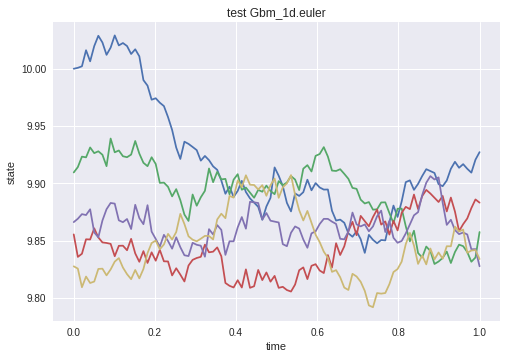

In [0]:
gbm1 = Gbm_1d(init_state=10., drift_ratio=.03, vol_ratio=.25)
grid = np.linspace(0,1,100)
plt.figure()
plt.title('test Gbm_1d.euler')
plt.xlabel('time')
plt.ylabel('state')
for i in range(5):
  xh = gbm1.euler(grid)
  plt.plot(grid, xh)
plt.show()